In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('D:/ML/House/train.csv')
test = pd.read_csv('D:/ML/House/test.csv')

In [3]:
train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

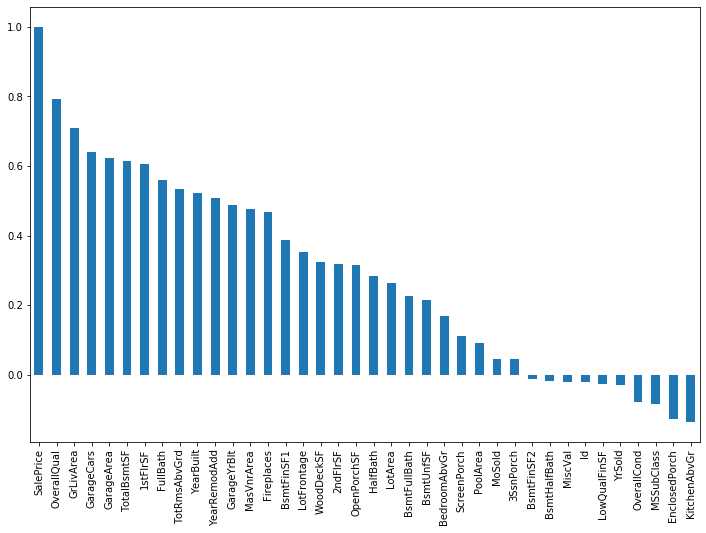

In [6]:
train.corr()['SalePrice'].sort_values(ascending=False).plot(kind='bar', figsize=(12,8))
plt.show()

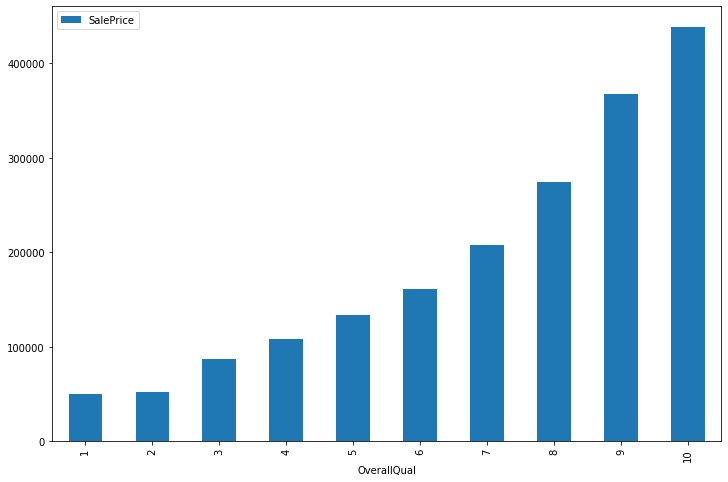

In [7]:
qual_pivot = train.pivot_table(index='OverallQual', values='SalePrice')
qual_pivot.plot(kind='bar', figsize=(12,8))
plt.show()

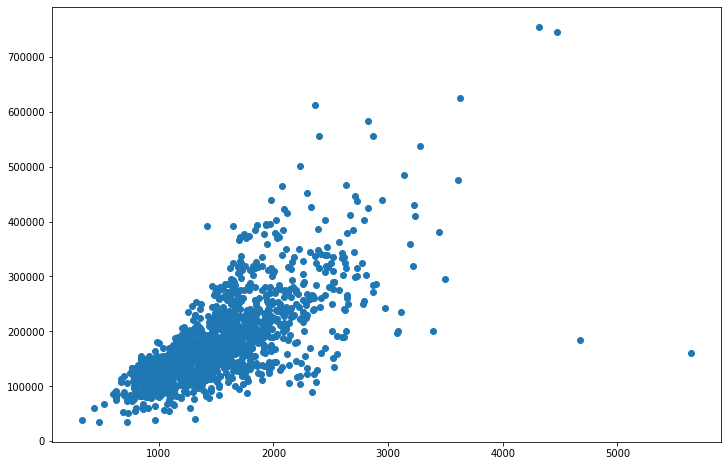

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.show()

In [9]:
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 700000)].index)

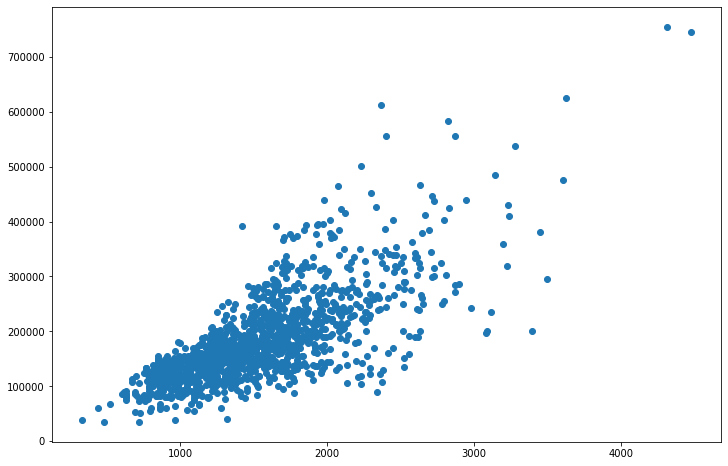

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.show()

In [11]:
train_ID = train['Id']
test_ID = test['Id']
    
train.drop('Id', axis = 1, inplace = True)    
test.drop('Id', axis = 1, inplace = True)

In [12]:
train["SalePrice"] = np.log1p(train["SalePrice"])
train_saleprice = train['SalePrice'].values

In [13]:
train = train.drop(['SalePrice'], axis = 1)
data = pd.concat((train, test)).reset_index(drop = True)

In [14]:
data_missing = data.isnull().sum()/len(data) * 100
data_missing = data_missing.drop(data_missing[data_missing == 0].index).sort_values(ascending = False)
missing = pd.DataFrame({'Missing_percentage' : data_missing})
missing

,Missing_percentage
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


In [15]:
data['PoolQC'] = data['PoolQC'].fillna('None')

In [16]:
data['MiscFeature'] = data['MiscFeature'].fillna('None')

In [17]:
data['Alley'] = data['Alley'].fillna('None')

In [18]:
data['Fence'] = data['Fence'].fillna('None')

In [19]:
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')


In [20]:
data['LotFrontage'] = data['LotFrontage'].fillna('None')


In [21]:
data['GarageQual'] = data['GarageQual'].fillna('None')
data['GarageCond'] = data['GarageCond'].fillna('None')
data['GarageFinish'] = data['GarageFinish'].fillna('None')
data['GarageType'] = data['GarageType'].fillna('None')


In [22]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
data['GarageCars'] = data['GarageCars'].fillna(0)
data['GarageArea'] = data['GarageArea'].fillna(0)


In [23]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        data[col] = data[col].fillna(0)

In [24]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        data[col] = data[col].fillna('None')

In [25]:
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [26]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [27]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

In [28]:
data['Utilities'] = data['Utilities'].fillna(data['Utilities'].mode()[0])

In [29]:
data['Functional'] = data['Functional'].fillna(data['Functional'].mode()[0])

In [30]:
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

In [31]:
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])

In [32]:
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

In [33]:
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])

In [34]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [35]:
for feature in data:
        if data[feature].dtype != "object":
                data[feature] = np.log1p(data[feature])

In [36]:
categorical_features = data.select_dtypes(exclude = np.number).columns

In [37]:
from sklearn.preprocessing import LabelEncoder

for c in categorical_features:
    lbl = LabelEncoder() 
    data[c] = lbl.fit_transform(list(data[c].values))

In [38]:
train = data[:train.shape[0]]
test = data[train.shape[0]:]

In [39]:
X = train
y = train_saleprice

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [42]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('RIDGECV', RidgeCV()))
models.append(('EN', ElasticNet()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))

In [43]:
scoring = 'neg_mean_squared_error'

results = []
names = []
m, model_name = float('-inf'), ''
for name, model in models:
    kfold = KFold()
    cross_val_res = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    print('Model:', name, '\tMean:', cross_val_res.mean(), '\tStd:', cross_val_res.std())
    results.append(cross_val_res)
    names.append(name)
    if cross_val_res.mean() > m:
        m = cross_val_res.mean()
        model_name = name

Model: LR 	Mean: -0.0157989440886832 	Std: 0.0013632337926317145
Model: LASSO 	Mean: -0.15977171061063794 	Std: 0.00810634348211992
Model: RIDGE 	Mean: -0.01613655663600212 	Std: 0.0016619329376546558
Model: RIDGECV 	Mean: -0.01597535019563259 	Std: 0.0015634881183927158
Model: EN 	Mean: -0.15953976176314866 	Std: 0.008512002786355726
Model: CART 	Mean: -0.04276762006976881 	Std: 0.004195760035736031
Model: KNN 	Mean: -0.06847897499086701 	Std: 0.0026843065841308843
Model: SVR 	Mean: -0.07285842965065768 	Std: 0.0052423107083744746


In [44]:
ridge_cv = Ridge()
ridge_predictions = ridge_cv.fit(X, y).predict(test.select_dtypes(include=[np.number]))
ridge_predictions = np.expm1(ridge_predictions)

In [45]:
import xgboost as xgb

In [52]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1, silent=True) 
model_xgb.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=360,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

In [47]:
xgb_preds = np.expm1(model_xgb.predict(test.select_dtypes(include=[np.number])))

In [49]:
preds = 0.7 * ridge_predictions + 0.3 * xgb_preds

In [50]:
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = preds

In [51]:
submission

,Id,SalePrice
0,1461,121410.476640
1,1462,162285.619560
2,1463,180510.590085
3,1464,193766.798841
4,1465,191601.093000
...,...,...
1454,2915,86081.377110
1455,2916,81496.920148
1456,2917,164214.599454
1457,2918,119066.891100
